<a href="https://colab.research.google.com/github/yourcodeishere/Data-Analyst-Project/blob/main/EDA_for_Two_Centuries_Ultra_Marathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import seaborn as sns

df=pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

<ipython-input-3-8acccec785dd>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [7]:
df2 = df.copy()

df2=df2[(df['Event distance/length'].isin(['50km','50mi'])) &
  (df['Year of event'] == 2020) &
    (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)=='USA')]


In [9]:
#let's do some data cleaning
#we want the country code on the Event name to be in seperated column called 'Event Country' & remove 'h' on athlete perfomance

df2['Event country']=df['Event name'].str.extract(r'\((.*?)\)')
df2['Athlete performance']=df['Athlete performance'].str[:-2]



In [10]:
df2.shape

(26090, 14)

In [11]:
#next step let's created another columns for athelete age when they participated on the event

df2['Athlete_age']=2020-df2['Athlete year of birth']

In [12]:
#lets drop some column to tidy up table:
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis = 1)


In [13]:
#lets eliminate null data
df2=df2.dropna()

In [14]:
#eliminate duplicates
df2=df2.drop_duplicates()

In [15]:
df2.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Event country,Athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55,M,15.158,71287,USA,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32,M,12.369,629508,USA,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57,M,12.099,64838,USA,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02,M,11.449,704450,USA,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34,M,11.212,810281,USA,43.0
...,...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48,F,7.013,816361,USA,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22,F,6.706,326469,USA,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24,F,6.705,372174,USA,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30,F,6.543,860349,USA,39.0


<Axes: xlabel='Event distance/length', ylabel='Count'>

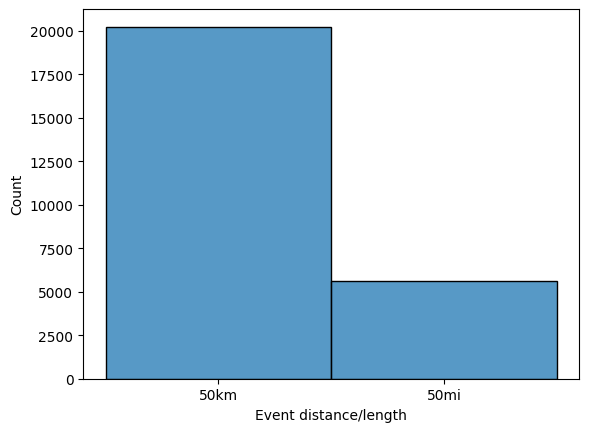

In [16]:
#question I want to answer : how big is the difference betwen 50km and 50mi participant

sns.histplot(df2['Event distance/length'])

Text(0, 0.5, 'Count')

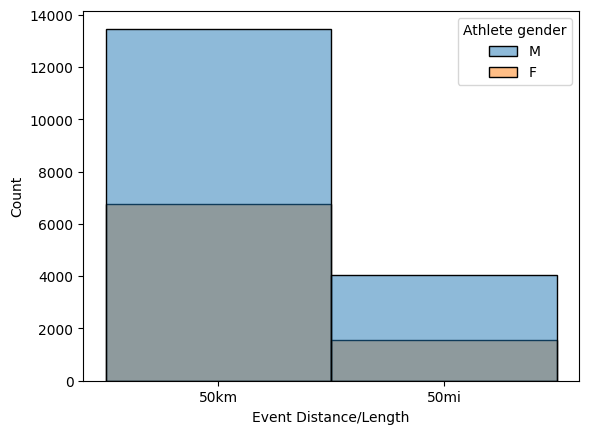

In [22]:
#might as well show how much male and female athele that patricipate on that graph

import matplotlib.pyplot as plt
sns.histplot(df2,x= 'Event distance/length', hue ='Athlete gender')

plt.xlabel('Event Distance/Length')
plt.ylabel('Count')

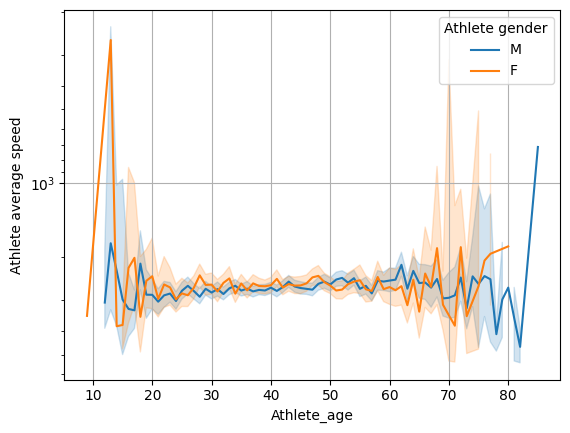

In [42]:
#average speed
import matplotlib.pyplot as plt

sns.lineplot(data=df2, x ='Athlete_age', y='Athlete average speed', hue ='Athlete gender')
plt.yscale('log')
plt.grid()

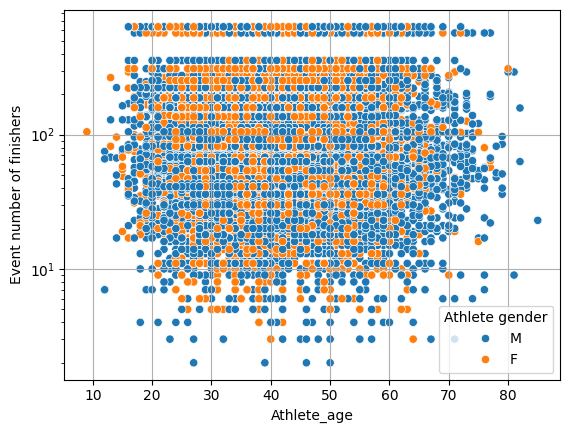

In [43]:
#participant cauntry
import matplotlib.pyplot as plt

sns.scatterplot(data=df2, x ='Athlete_age', y='Event number of finishers', hue ='Athlete gender')
plt.yscale('log')
plt.grid()